# Cap. 6 - NumPy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Métodos básicos para ndarrays


### Comparações lógicas em arrays

Existe um conjunto de métodos que fazem comparações lógicas em arrays elemento a elemento:

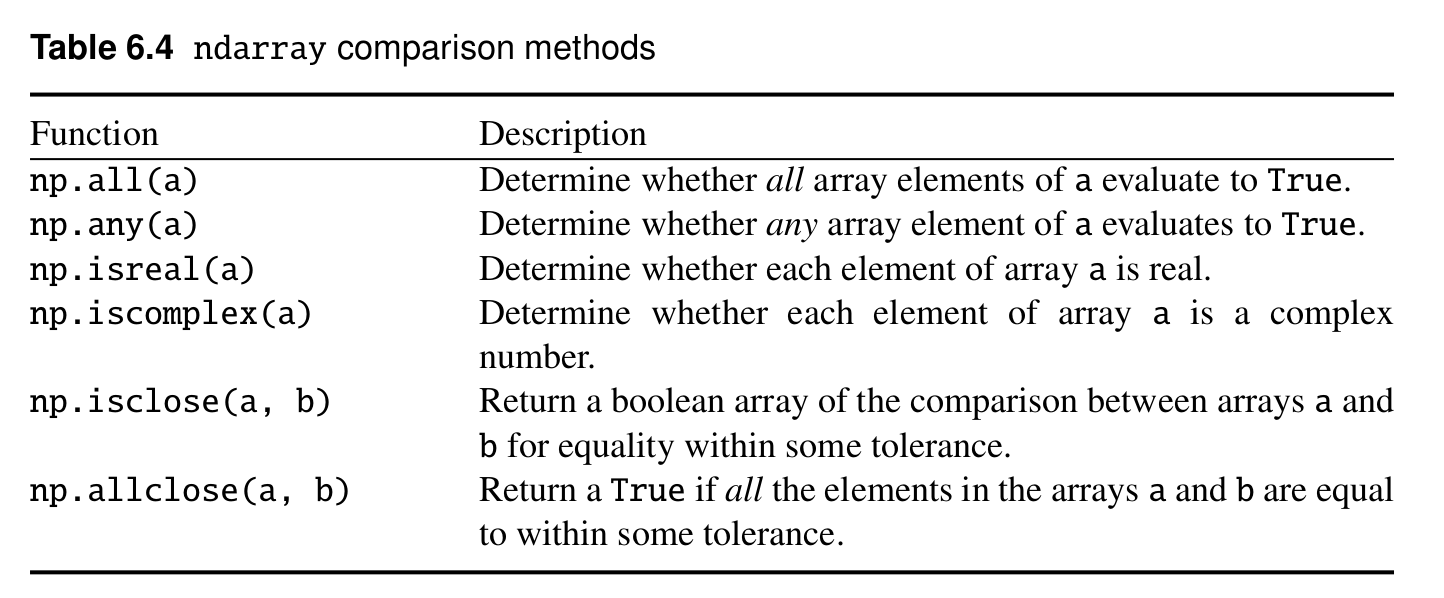

In [ ]:
a = np.array([[1 , 2, 0, 3],
              [4,  0, 1, 1]])

In [ ]:
a==True

array([[ True, False, False, False],
       [False, False,  True,  True]])

In [ ]:
np.all(a) #todos são True?

False

In [ ]:
np.any(a) #algum é True?

True

In [ ]:
np.isreal(a) #quais são reais?

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [ ]:
np.all(np.isreal(a)) #são todos reais?

True

In [ ]:
np.iscomplex(a) #quais são complex?

array([[False, False, False, False],
       [False, False, False, False]])

In [ ]:
np.any(np.iscomplex(a)) #tem algum complexo?

False

In [ ]:
np.isnan(a) #quais são nan?

array([[False, False, False, False],
       [False, False, False, False]])

`np.isclose(a,b)`: retorna uma lista de True ou False baseado na comparação

`abs(a-b) <= (atol + rtol*abs(b))`

- *atol*: tolerância absoluta ($10^{-8}$ por padrão);
- *rtol*: tolerância relativa ($10^{-5}$ por padrão);

`np.allclose(a,b)`: retorna True ou False dependendo se `np.isclose(a,b)` tem apenas Trues ou Falses, respectivamente.

Vejamos:

In [ ]:
a = np.array([1.66e-27, 1.38e-23, 6.63e-34, 6.02e23, np.nan])
b = np.array([1.66e-27, 1.66e-27, 1.66e-27, 6.00e23, np.nan])

In [ ]:
a==b

array([ True, False, False, False, False])

In [ ]:
np.isclose(a, b)

array([ True,  True,  True, False, False])

In [ ]:
#assume nan=nan
np.isclose(a, b, equal_nan=True)

array([ True,  True,  True, False,  True])

In [ ]:
np.isclose(a, b, atol=0)

array([ True, False, False, False, False])

In [ ]:
np.allclose(a,b)

False

In [ ]:
sinx2          = np.sin(np.linspace(0, np.pi, 100))**2
um_menos_cosx2 = 1 - np.cos(np.linspace(0, np.pi, 100))**2

In [ ]:
#devido à precisão finita
sinx2==um_menos_cosx2

array([ True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False,  True,  True, False, False, False, False, False,
       False,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True, False, False, False, False,  True, False,
       False,  True, False,  True,  True,  True,  True, False, False,
        True, False, False, False, False,  True, False,  True, False,
        True,  True,  True, False, False,  True, False,  True,  True,
       False, False, False,  True, False, False, False,  True,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
np.isclose(sinx2, um_menos_cosx2)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
np.allclose(sinx2, um_menos_cosx2)

True

*Problema 6.1.3*: Distribuição gaussiana.

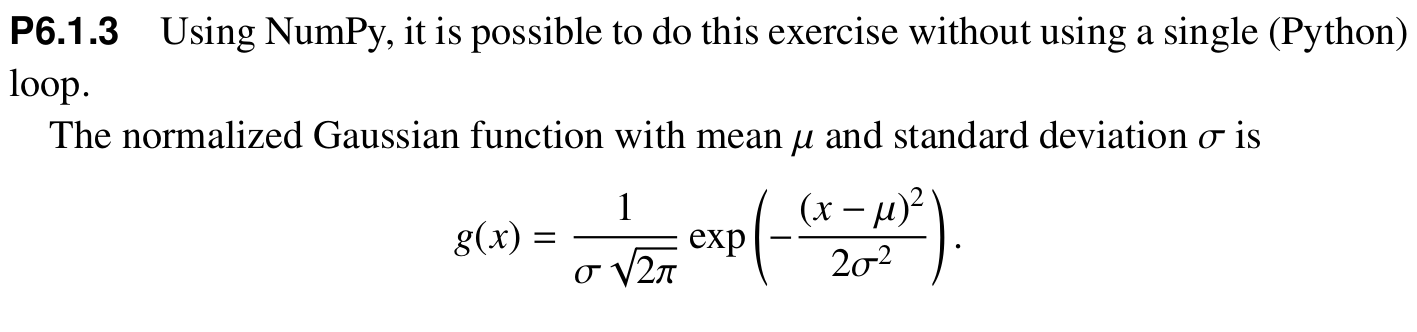

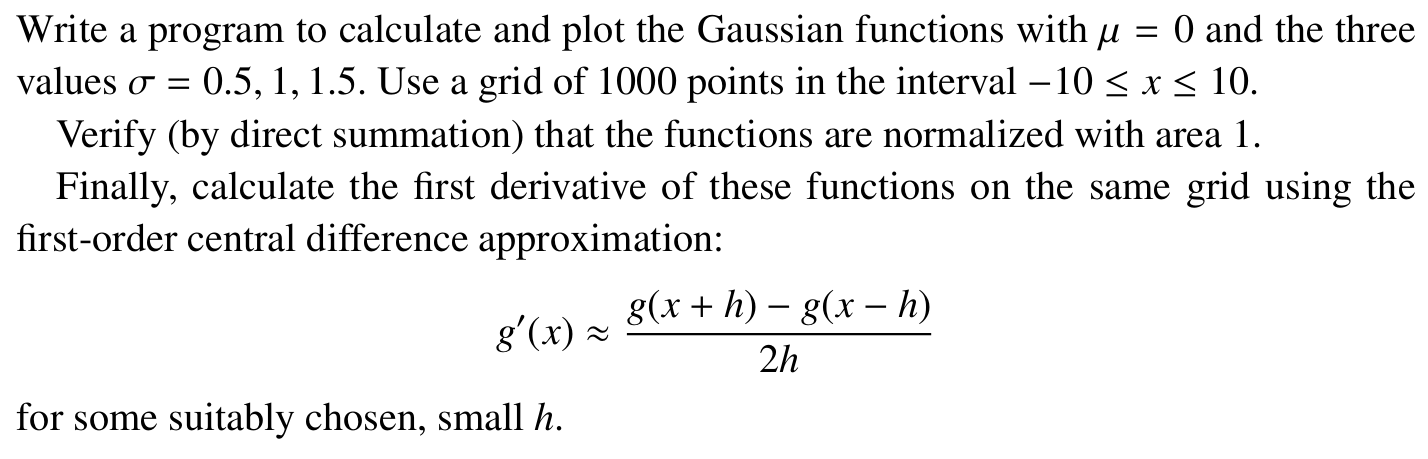

In [ ]:
def gauss(mu=0, sigma=1):
    x = np.linspace(-10,10,1000)
    y = np.exp(-(x-mu)**2 / (2*sigma**2)) / (sigma*np.sqrt(2*np.pi))

    return x,y

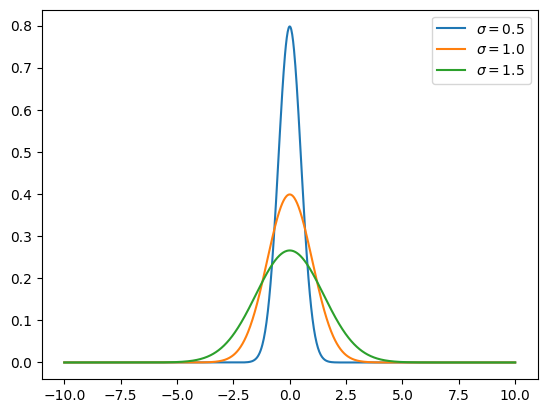

In [ ]:
plt.plot(*gauss(sigma=0.5),label='$\sigma=0.5$')
plt.plot(*gauss(sigma=1.0),label='$\sigma=1.0$')
plt.plot(*gauss(sigma=1.5),label='$\sigma=1.5$')
plt.legend()

In [ ]:
for sigma in [0.5,1.0,1.5]:
    x, y = gauss(sigma=sigma)
    dx = x[1]-x[0]
    print(sigma,np.sum(y)*dx)

0.5 1.0000000000000002
1.0 1.0000000000000002
1.5 0.9999999999750037


In [ ]:
a = np.array([1,2,3,4])

In [ ]:
x, y = gauss(sigma=sigma)
dx = x[1]-x[0]
dgauss = (y[1:]-y[0:-1])/dx

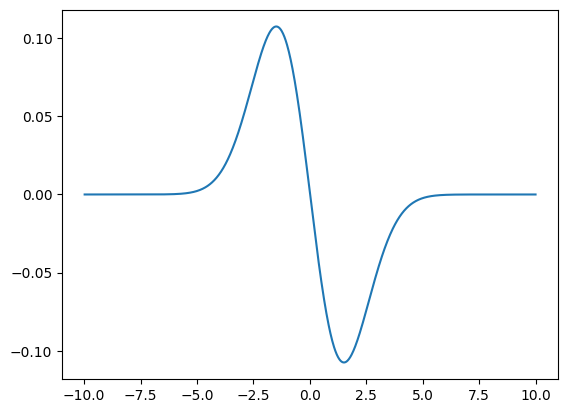

In [ ]:
plt.plot(x[1:],dgauss)

In [ ]:
def f_dgauss(mu=0,sigma=1):
    x, y = gauss(mu=mu, sigma=sigma)
    dx = x[1]-x[0]
    dgauss = (y[1:]-y[0:-1])/dx

    return x[1:],dgauss

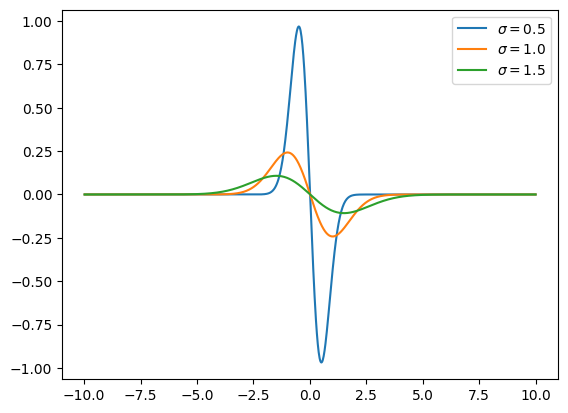

In [ ]:
plt.plot(*f_dgauss(sigma=0.5),label='$\sigma=0.5$')
plt.plot(*f_dgauss(sigma=1.0),label='$\sigma=1.0$')
plt.plot(*f_dgauss(sigma=1.5),label='$\sigma=1.5$')
plt.legend()

Note que não usamos nenhum loop Python para fazer os cálculos. De modo geral, esse tipo de solução é muito mais rápida.

## Leitura e escrita arrays em arquivos

O numpy oferece funções para salvar arrays em arquivos, bem como ler arquivos no formato array.

`np.save` e `np.load` fazem isso usando um formato binário, usualmente chamado de `.npy`.

Por exemplo:

In [ ]:
a = np.array([0,1,2,3,4,5,6,7,8,9])

In [ ]:
np.save('file_a.npy', a)

In [ ]:
!ls

file_a.npy  sample_data


In [ ]:
a_lido = np.load('file_a.npy')

In [ ]:
a_lido

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### `np.loadtxt`

Essa função também lê arquivos. Esses arquivos geralmente estão em formato de texto e, além disso, a função apresenta diversos parâmetros.


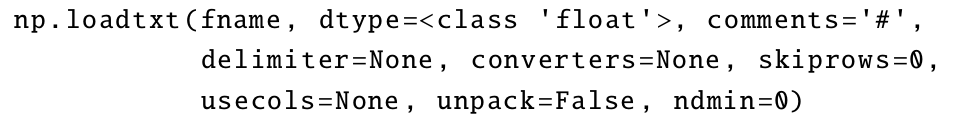

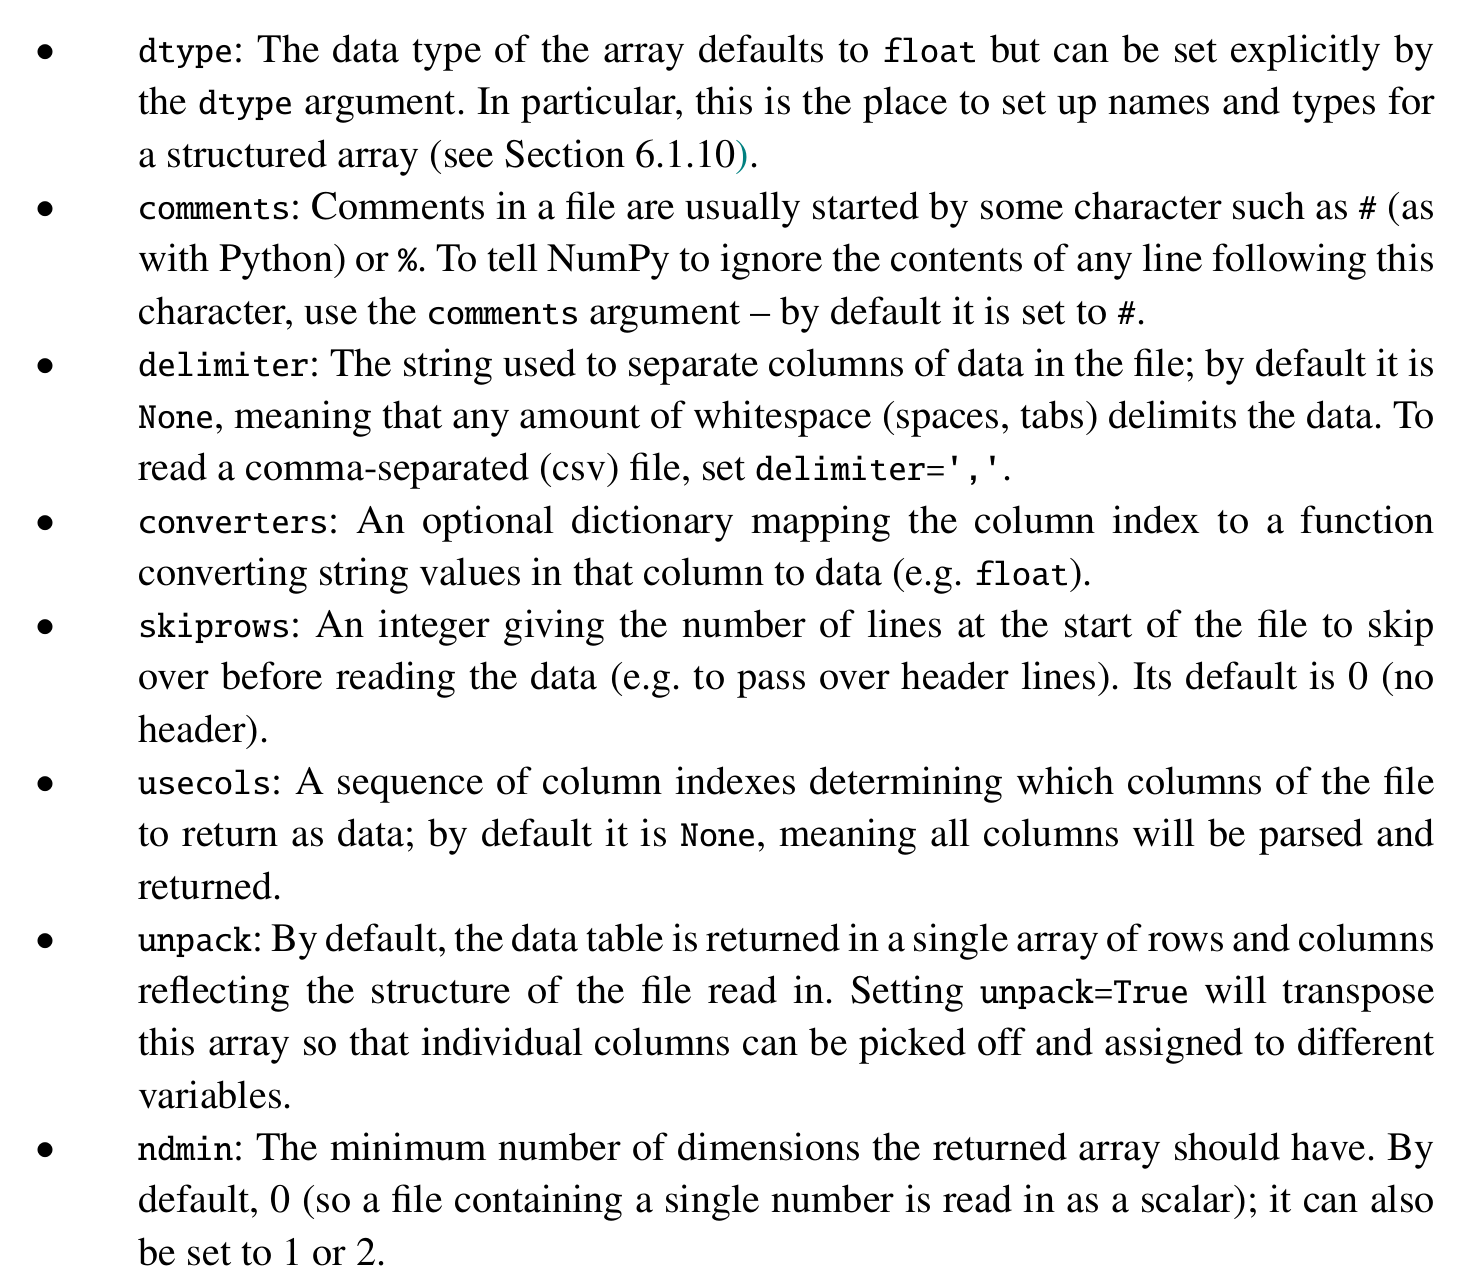

Por exemplo, supondo um arquivo data.txt com várias colunas

```
col1 , col3 , col4 = np.loadtxt('data.txt ', usecols=(0, 2, 3), unpack=True)
```

faz a leitura das colunas 0, 2 e 3 e armazena o resultado em três arrays (col1, col2 e col3).


Exemplo E6.6. Lendo um arquivo no formato:

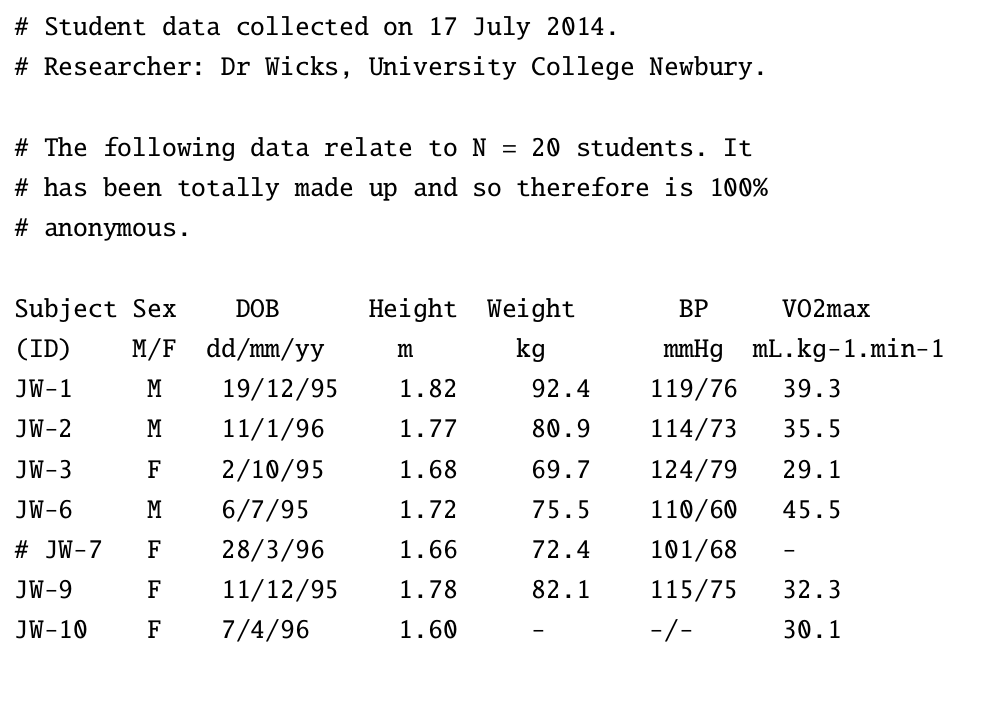

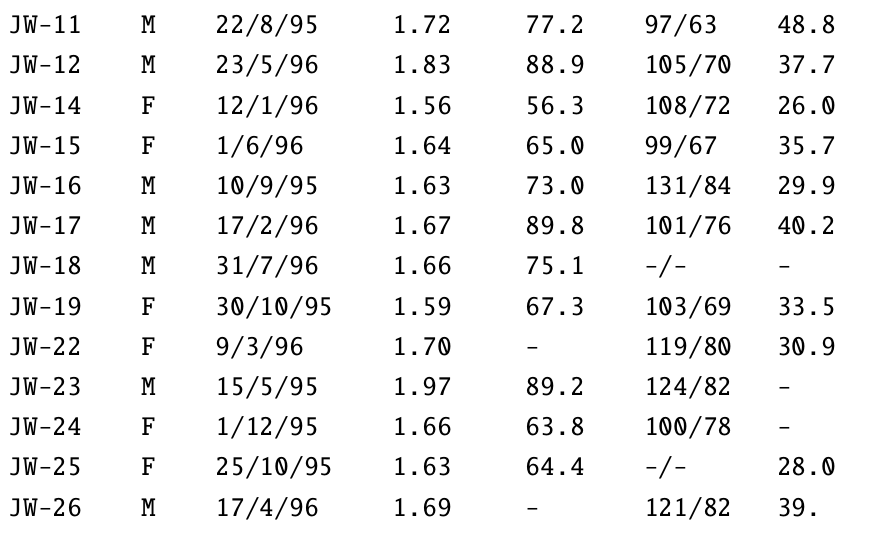

In [ ]:
!wget 'https://scipython.com/static/media/2/examples/E6/eg6-a-student-data.txt'

--2024-01-19 01:00:23--  https://scipython.com/static/media/2/examples/E6/eg6-a-student-data.txt
Resolving scipython.com (scipython.com)... 3.130.82.216
Connecting to scipython.com (scipython.com)|3.130.82.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1471 (1.4K) [text/plain]
Saving to: ‘eg6-a-student-data.txt’

eg6-a-student-data. 100%[===================>]   1.44K  --.-KB/s    in 0s      

2024-01-19 01:00:23 (566 MB/s) - ‘eg6-a-student-data.txt’ saved [1471/1471]



Vamos supor que nosso interesse é calcular a altura média dos estudantes agrupados por gênero.

In [ ]:
fname = 'eg6-a-student-data.txt'
dtype1 = np.dtype([('gender', '|S1'), ('height', 'f8')])

#skiprows=9 número de linhas que vamos ignorar
#usecols=(1,3) colunas que estamos interessados

a = np.loadtxt(fname, dtype=dtype1, skiprows=9, usecols=(1,3))

In [ ]:
a

array([(b'M', 1.82), (b'M', 1.77), (b'F', 1.68), (b'M', 1.72),
       (b'F', 1.78), (b'F', 1.6 ), (b'M', 1.72), (b'M', 1.83),
       (b'F', 1.56), (b'F', 1.64), (b'M', 1.63), (b'M', 1.67),
       (b'M', 1.66), (b'F', 1.59), (b'F', 1.7 ), (b'M', 1.97),
       (b'F', 1.66), (b'F', 1.63), (b'M', 1.69)],
      dtype=[('gender', 'S1'), ('height', '<f8')])

In [ ]:
a['gender']==b'M'

array([ True,  True, False,  True, False, False,  True,  True, False,
       False,  True,  True,  True, False, False,  True, False, False,
        True])

In [ ]:
a['height'][(a['gender']==b'M')]

array([1.82, 1.77, 1.72, 1.72, 1.83, 1.63, 1.67, 1.66, 1.97, 1.69])

In [ ]:
a['height'][(a['gender']==b'F')]

array([1.68, 1.78, 1.6 , 1.56, 1.64, 1.59, 1.7 , 1.66, 1.63])

In [ ]:
a['height'][~(a['gender']==b'M')]

array([1.68, 1.78, 1.6 , 1.56, 1.64, 1.59, 1.7 , 1.66, 1.63])

In [ ]:
a['height'][(a['gender']==b'M')].mean()

1.748

In [ ]:
a['height'][(a['gender']==b'F')].mean()

1.6488888888888888

Suponha agora que precisamos do peso médio. A coluna de interesse é 4. Porém:

In [ ]:
fname = 'eg6-a-student-data.txt'
dtype1 = np.dtype([('gender', '|S1'), ('weight', 'f8')])

#skiprows=9 número de linhas que vamos ignorar
#usecols=(1,4) colunas que estamos interessados

a = np.loadtxt(fname, dtype=dtype1, skiprows=9, usecols=(1,4))

ValueError: could not convert string '-' to float64 at row 5, column 5.

Existem valores faltantes, que estão marcados com "-". Para resolver esse problema, podemos usar o parâmetro `converters`.

In [ ]:
def parse_weight(s):
    try:
        return float(s)
    except ValueError :
        return np.nan

fname = 'eg6-a-student-data.txt'
dtype1 = np.dtype([('gender', '|S1'), ('weight', 'f8')])

#skiprows=9 número de linhas que vamos ignorar
#usecols=(1,4) colunas que estamos interessados

a = np.loadtxt(fname, dtype=dtype1, skiprows=9,
               usecols=(1,4),
               converters={4: parse_weight})

In [ ]:
#sempre que temos um "-", o valor se torna nan
a

array([(b'M', 92.4), (b'M', 80.9), (b'F', 69.7), (b'M', 75.5),
       (b'F', 82.1), (b'F',  nan), (b'M', 77.2), (b'M', 88.9),
       (b'F', 56.3), (b'F', 65. ), (b'M', 73. ), (b'M', 89.8),
       (b'M', 75.1), (b'F', 67.3), (b'F',  nan), (b'M', 89.2),
       (b'F', 63.8), (b'F', 64.4), (b'M',  nan)],
      dtype=[('gender', 'S1'), ('weight', '<f8')])

In [ ]:
a['weight'][(a['gender']==b'M')].mean()

nan

Veja que a média retorna nan. Devemos fazer algum tratamento nos dados faltantes. Uma possibilidade é remover todos.

In [ ]:
a['weight'][(a['gender']==b'M') & np.isfinite(a['weight'])].mean()

82.44444444444444

In [ ]:
a['weight'][(a['gender']==b'F') & np.isfinite(a['weight'])].mean()

66.94285714285715

Usar o `np.nanmean` é outra possibilidade. Essa função automaticamente ignora os nans.

In [ ]:
np.nanmean(a['weight'][(a['gender']==b'M')])

82.44444444444444

In [ ]:
np.nanmean(a['weight'][(a['gender']==b'F')])

66.94285714285715

Suponha agora que estamos interessados na pressão arterial. Nesse caso, a coluna de interesse é a 5.

In [ ]:
fname = 'eg6-a-student-data.txt'
dtype1 = np.dtype([('gender', '|S1'), ('bp', 'f8')])

#skiprows=9 número de linhas que vamos ignorar
#usecols=(1,5) colunas que estamos interessados

a = np.loadtxt(fname, dtype=dtype1, skiprows=9,
               usecols=(1,5),
               )

ValueError: could not convert string '119/76' to float64 at row 0, column 6.

Porém, essa coluna tem dois valores separados por "/". Esses valores correspondem:

- "Pressão sistólica": pressão nas artérias quando o coração contrai ($<130$);
- "Pressão diastólica": pressão nas artérias quando o coração relaxa ($<85$);

Os famosos 12/8...

Para resolver isso, vamos reformatar o dado, substituindo "/" por " ", o que irá criar uma nova coluna no dado.

In [ ]:
fname = 'eg6-a-student-data.txt'
dtype = np.dtype([('gender', '|S1'), ('bps', 'f8'), ('bpd', 'f8')])

def parse_bp(s):
    try:
        return float(s)
    except ValueError:
        return np.nan

#note que é um gerador
def reformat_lines(f):
    for line in f:
        line = line.replace('/',' ')
        yield line

with open(fname) as f:
    gender, bps, bpd = np.loadtxt(reformat_lines(f), dtype, skiprows=9,
                       usecols=(1,7,8),
                       converters={7: parse_bp, 8: parse_bp},
                       unpack=True)
#por que são as colunas (7,8) e não (5,6)?
#a coluna com datas também é dividida!

In [ ]:
gender

array([b'M', b'M', b'F', b'M', b'F', b'F', b'M', b'M', b'F', b'F', b'M',
       b'M', b'M', b'F', b'F', b'M', b'F', b'F', b'M'], dtype='|S1')

In [ ]:
bps

array([119., 114., 124., 110., 115.,  nan,  97., 105., 108.,  99., 131.,
       101.,  nan, 103., 119., 124., 100.,  nan, 121.])

In [ ]:
bpd

array([76., 73., 79., 60., 75., nan, 63., 70., 72., 67., 84., 76., nan,
       69., 80., 82., 78., nan, 82.])

In [ ]:
#média da alta
np.nanmean(bps), np.nanmean(bps[gender==b'M']), np.nanmean(bps[gender==b'F'])

(111.875, 113.55555555555556, 109.71428571428571)

In [ ]:
#média da baixa
np.nanmean(bpd), np.nanmean(bpd[gender==b'M']), np.nanmean(bpd[gender==b'F'])

(74.125, 74.0, 74.28571428571429)

### `np.genfromtxt`

Essa função é parecida com a `np.loadtxt`, mas conta com ainda mais opções.

**Cabeçalhos e rodapés**

- `skip_header`: número de linhas ignoradas no início do arquivo.
- `skip_footer`: número de linhas ignoradas no fim do arquivo.

**Colunas com tamanhos fixo**

Por exemplo:

```
 12  100.231.03
 11 1201.842.04
 11   99.324.02
```
Aqui, a primeira linha seria:

[1, 2, 100.231, 0.03]

Com o `np.loadtxt` não seria possível ler esse arquivo uma vez que não existe separação entre as colunas 0 e 2, e 3 e 4. Porém, com a `np.genfromtxt` o parâmetro `delimiter` pode conter uma lista com as posições de colunas.



In [ ]:
?np.loadtxt

In [ ]:
s=""" 12  100.231.03
 11 1201.842.04
 11   99.324.02"""
with open('data.txt','w') as f:
    f.writelines(s)

In [ ]:
!ls

data.txt  eg6-a-student-data.txt  file_a.npy  sample_data


In [ ]:
!cat data.txt

 12  100.231.03
 11 1201.842.04
 11   99.324.02

In [ ]:
np.genfromtxt(fname='data.txt',
              delimiter=[2, 1, 9, 3], #note que as posições são acumuladas
              dtype='i4 , i4 , f8 , f8')

array([(1, 2,  100.231, 0.03), (1, 1, 1201.842, 0.04),
       (1, 1,   99.324, 0.02)],
      dtype=[('f0', '<i4'), ('f1', '<i4'), ('f2', '<f8'), ('f3', '<f8')])

**Dados faltantes**

A função `np.genfromtxt` lida com isso automaticamente usando a seguinte estratégia:

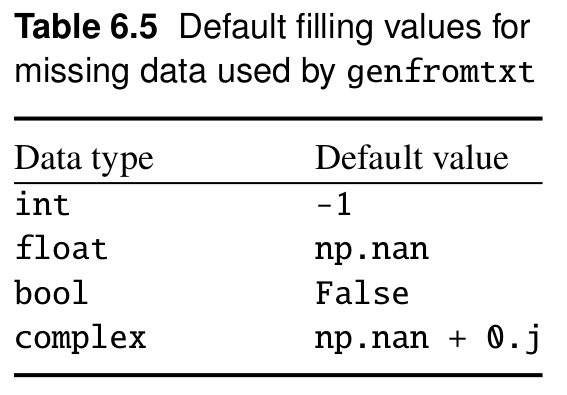

In [ ]:
s="""10.1,4,-0.1,2
10.2,4,,0
10.3,???,,4
10.4,2,0.,
10.5,-1,???,3"""

with open('data2.txt','w') as f:
    f.writelines(s)

In [ ]:
!cat data2.txt

10.1,4,-0.1,2
10.2,4,,0
10.3,???,,4
10.4,2,0.,
10.5,-1,???,3

In [ ]:
np.genfromtxt(fname='data2.txt',
               dtype ='f8, i4, f8, i4',
               delimiter=',')
#veja que os ??? e os vazios foram mapeados em nan

array([(10.1,  4, -0.1,  2), (10.2,  4,  nan,  0), (10.3, -1,  nan,  4),
       (10.4,  2,  0. , -1), (10.5, -1,  nan,  3)],
      dtype=[('f0', '<f8'), ('f1', '<i4'), ('f2', '<f8'), ('f3', '<i4')])

Os argumentos:

- `missing_values` e `filling_values`

dão mais controle para esse tratamento de dados faltantes.

In [ ]:
np.genfromtxt(fname='data2.txt',
               dtype ='f8, i4, f8, i4',
               missing_values={1: '???', 2: '???'},
               filling_values={1: 999, 2: -99., 3: 0},
               delimiter=',')
#veja que os ??? e os vazios foram mapeados em nan

array([(10.1,   4,  -0.1, 2), (10.2,   4, -99. , 0),
       (10.3, 999, -99. , 4), (10.4,   2,   0. , 0),
       (10.5,  -1, -99. , 3)],
      dtype=[('f0', '<f8'), ('f1', '<i4'), ('f2', '<f8'), ('f3', '<i4')])

**Nome de colunas**

O argumento `names` permite definir o nome das colunas diretamente dos dados (`names=True`), ou ser uma lista de strings com os nomes.


In [ ]:
s="""col1,col2,col3,col4
10.1,4,-0.1,2
10.2,4,,0
10.3,???,,4
10.4,2,0.,
10.5,-1,???,3"""

with open('data3.txt','w') as f:
    f.writelines(s)

In [ ]:
cat data3.txt

col1,col2,col3,col4
10.1,4,-0.1,2
10.2,4,,0
10.3,???,,4
10.4,2,0.,
10.5,-1,???,3

In [ ]:
np.genfromtxt(fname='data3.txt',
               dtype ='f8, i4, f8, i4',
               delimiter=',',
               names=True)
#assume que primeira linha (depois do skip_header) contém os nomes das colunas

array([(10.1,  4, -0.1,  2), (10.2,  4,  nan,  0), (10.3, -1,  nan,  4),
       (10.4,  2,  0. , -1), (10.5, -1,  nan,  3)],
      dtype=[('col1', '<f8'), ('col2', '<i4'), ('col3', '<f8'), ('col4', '<i4')])

*Exemplo E6.7*: Efeito [*Stroop effect*](https://en.wikipedia.org/wiki/Stroop_effect)

Leia o mais rápido que puder

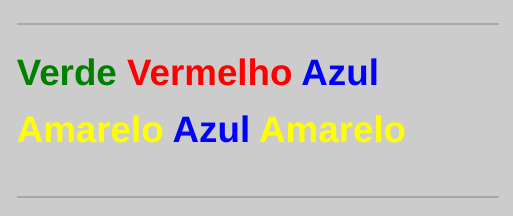

Agora faço o mesmo:

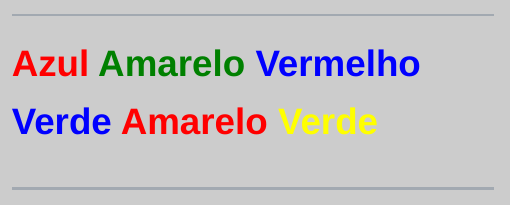

In [ ]:
!wget https://scipython.com/static/media/2/examples/E6/stroop.txt

--2024-01-19 01:27:32--  https://scipython.com/static/media/2/examples/E6/stroop.txt
Resolving scipython.com (scipython.com)... 3.130.82.216
Connecting to scipython.com (scipython.com)|3.130.82.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 470 [text/plain]
Saving to: ‘stroop.txt’

stroop.txt          100%[===================>]     470  --.-KB/s    in 0s      

2024-01-19 01:27:32 (324 MB/s) - ‘stroop.txt’ saved [470/470]



In [ ]:
data = np.genfromtxt('stroop.txt', skip_header=1,
                     dtype=[('student','u8'), ('gender','S1'),
                            ('black','f8'), ('colour','f8')],
                     delimiter=',',
                     missing_values='X')

In [ ]:
# as colunas "black" e  "colour" representam os tempos para ler 25 palavras
# em cada configuração
data

array([( 1, b'F', 18.72, 31.11), ( 2, b'F', 21.14, 52.47),
       ( 3, b'F', 19.38, 33.92), ( 4, b'M', 22.03, 50.57),
       ( 5, b'M', 21.41, 29.63), ( 6, b'M', 15.18, 24.86),
       ( 7, b'F', 14.13, 33.63), ( 8, b'F', 19.91, 42.39),
       ( 9, b'F',   nan, 43.6 ), (10, b'F', 26.56, 42.31),
       (11, b'F', 19.73, 49.36), (12, b'M', 18.47, 31.67),
       (13, b'M', 21.38, 47.28), (14, b'M', 26.05, 45.07),
       (15, b'F',   nan,   nan), (16, b'F', 15.77, 38.36),
       (17, b'F', 15.38, 33.07), (18, b'M', 17.06, 37.94),
       (19, b'M', 19.53,   nan), (20, b'M', 23.29, 49.6 ),
       (21, b'M', 21.3 , 45.56), (22, b'M', 17.12, 42.99),
       (23, b'F', 21.85, 51.4 ), (24, b'M', 18.15, 36.95),
       (25, b'M', 33.21, 61.59)],
      dtype=[('student', '<u8'), ('gender', 'S1'), ('black', '<f8'), ('colour', '<f8')])

In [ ]:
#remove dados nan
filtered_data = data[np.isfinite(data['black']) & np.isfinite(data['colour'])]
filtered_data

array([( 1, b'F', 18.72, 31.11), ( 2, b'F', 21.14, 52.47),
       ( 3, b'F', 19.38, 33.92), ( 4, b'M', 22.03, 50.57),
       ( 5, b'M', 21.41, 29.63), ( 6, b'M', 15.18, 24.86),
       ( 7, b'F', 14.13, 33.63), ( 8, b'F', 19.91, 42.39),
       (10, b'F', 26.56, 42.31), (11, b'F', 19.73, 49.36),
       (12, b'M', 18.47, 31.67), (13, b'M', 21.38, 47.28),
       (14, b'M', 26.05, 45.07), (16, b'F', 15.77, 38.36),
       (17, b'F', 15.38, 33.07), (18, b'M', 17.06, 37.94),
       (20, b'M', 23.29, 49.6 ), (21, b'M', 21.3 , 45.56),
       (22, b'M', 17.12, 42.99), (23, b'F', 21.85, 51.4 ),
       (24, b'M', 18.15, 36.95), (25, b'M', 33.21, 61.59)],
      dtype=[('student', '<u8'), ('gender', 'S1'), ('black', '<f8'), ('colour', '<f8')])

In [ ]:
#extrai os valores em cada configuração separados por gênero
nwords = 25

fb = filtered_data['black'][filtered_data['gender']==b'F'] / nwords
mb = filtered_data['black'][filtered_data['gender']==b'M'] / nwords

fc = filtered_data['colour'][filtered_data['gender']==b'F'] / nwords
mc = filtered_data['colour'][filtered_data['gender']==b'M'] / nwords

In [ ]:
fb

array([0.7488, 0.8456, 0.7752, 0.5652, 0.7964, 1.0624, 0.7892, 0.6308,
       0.6152, 0.874 ])

In [ ]:
# médias e desvios

mu_fb, sigma_fb = np.mean(fb), np.std(fb)
mu_fc, sigma_fc = np.mean(fc), np.std(fc)
mu_mb, sigma_mb = np.mean(mb), np.std(mb)
mu_mc, sigma_mc = np.mean(mc), np.std(mc)

In [ ]:
print('Mean and (standard deviation) times per word (sec)')
print('gender |    black      |    colour     | difference')
print('   F   | {:4.3f} ({:4.3f}) | {:4.3f} ({:4.3f}) |   {:4.3f}'
                    .format(mu_fb, sigma_fb, mu_fc, sigma_fc, mu_fc - mu_fb))
print('   M   | {:4.3f} ({:4.3f}) | {:4.3f} ({:4.3f}) |   {:4.3f}'
                    .format(mu_mb, sigma_mb, mu_mc, sigma_mc, mu_mc - mu_mb))

Mean and (standard deviation) times per word (sec)
gender |    black      |    colour     | difference
   F   | 0.770 (0.137) | 1.632 (0.306) |   0.862
   M   | 0.849 (0.186) | 1.679 (0.394) |   0.830


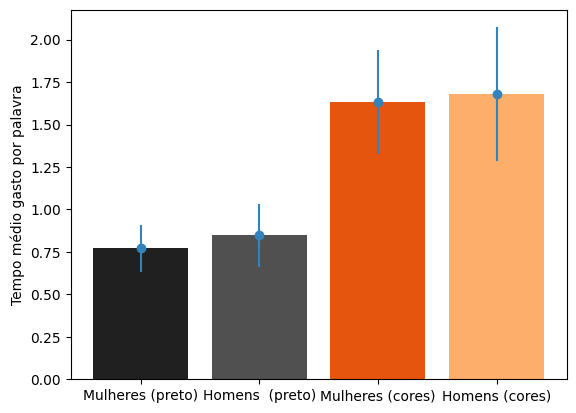

In [ ]:
labels=['Mulheres (preto)','Homens  (preto)','Mulheres (cores)','Homens (cores)']

plt.bar(labels,
        [mu_fb,mu_mb,mu_fc,mu_mc],
        color=['#202020','#505050','#e6550d','#fdae6b'])

plt.errorbar(labels,
        [mu_fb,mu_mb,mu_fc,mu_mc],
        yerr=[sigma_fb,sigma_mb,sigma_fc,sigma_mc],
        fmt="o",color='#3182bd'
       )

plt.ylabel('Tempo médio gasto por palavra');